   time_to_resolution  chaser_count  property_complaint_history  \
0                  34             5                           3   
1                  24             0                           3   
2                  39             4                           1   
3                  32             1                           2   
4                   8             4                           0   

   sla_breach_flag  is_complaint  
0                1             0  
1                0             0  
2                1             0  
3                1             0  
4                0             0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   time_to_resolution          5000 non-null   int64
 1   chaser_count                5000 non-null   int64
 2   property_complaint_history  5000 non-null   

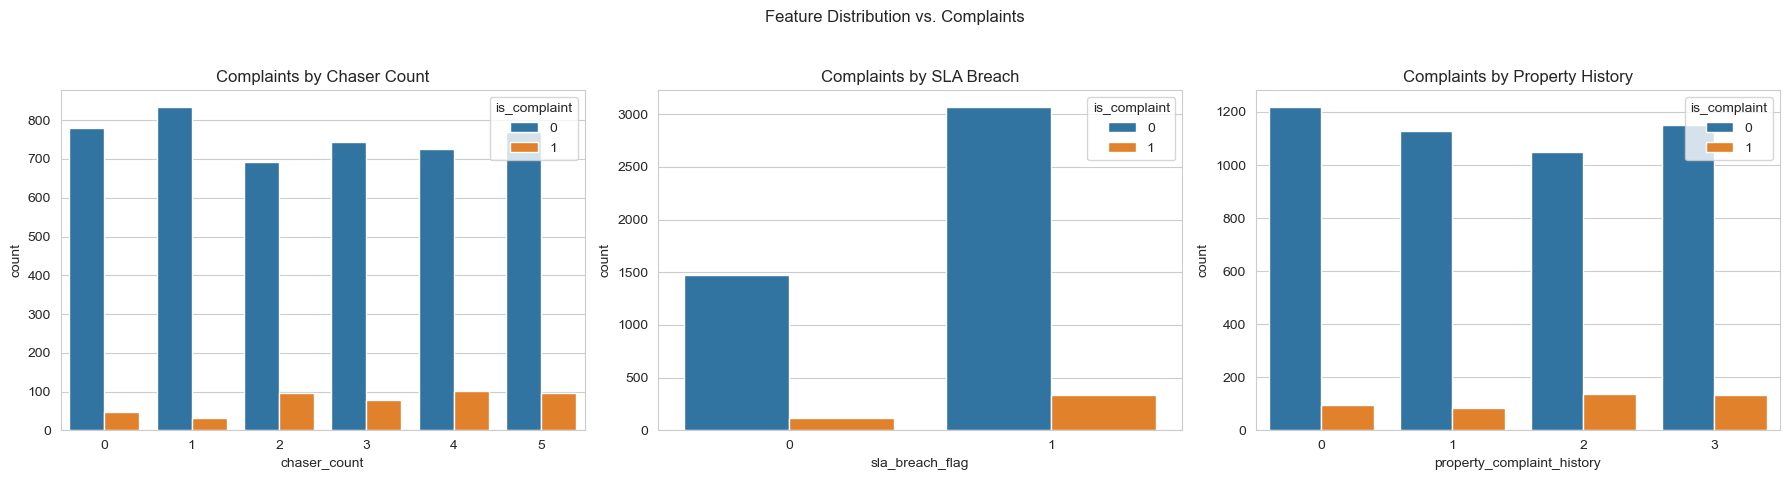

Training set shape: (4000, 4)
Test set shape: (1000, 4)
--- Logistic Regression (Baseline) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       910
           1       0.00      0.00      0.00        90

    accuracy                           0.91      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.83      0.91      0.87      1000

AUC-ROC Score: 0.61

--- XGBoost Classifier ---


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       910
           1       0.06      0.01      0.02        90

    accuracy                           0.90      1000
   macro avg       0.49      0.50      0.48      1000
weighted avg       0.83      0.90      0.86      1000

AUC-ROC Score: 0.56


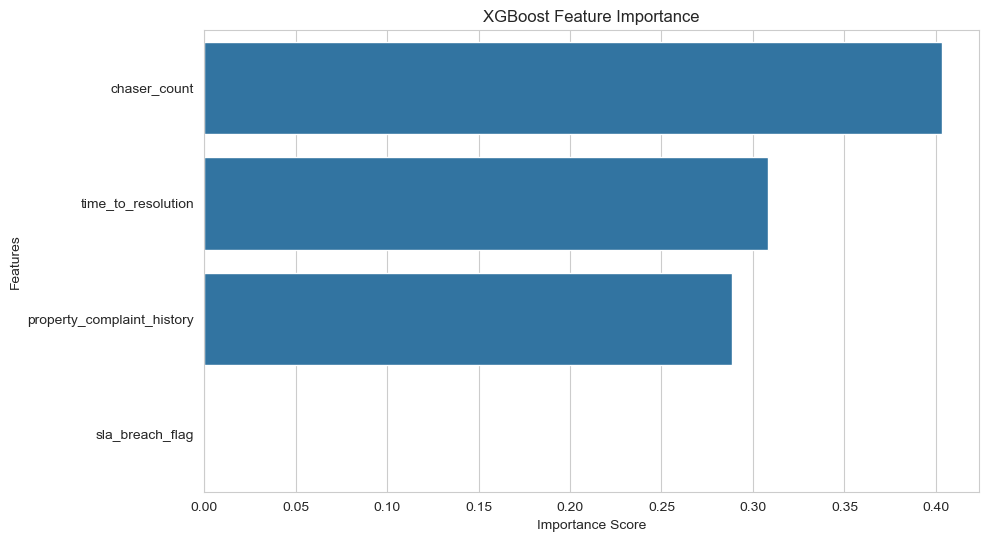


As shown, 'chaser_count' and 'time_to_resolution' are the strongest predictors.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import xgboost as xgb

# Set plot style
sns.set_style("whitegrid")

# ==============================================================================
# In your notebook, create a new cell here (Markdown) and add the title:
# ## 1. Load and Explore the Data
# ==============================================================================

# Load the dataset
df = pd.read_csv('/Users/vishalpatil/Data Science/Python/Projects/Complaints Prediction/complaints_data.csv')

# Display the first few rows and basic info
print(df.head())
print("\nData Info:")
df.info()

print("\nComplaint Distribution:")
print(df['is_complaint'].value_counts(normalize=True))

# ==============================================================================
# In your notebook, create a new cell here (Markdown) and add the title:
# ## 2. Exploratory Data Analysis (EDA)
# ==============================================================================

# Visualize the relationship between features and the target variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Feature Distribution vs. Complaints')

# Chaser Count
sns.countplot(ax=axes[0], x='chaser_count', hue='is_complaint', data=df)
axes[0].set_title('Complaints by Chaser Count')

# SLA Breach
sns.countplot(ax=axes[1], x='sla_breach_flag', hue='is_complaint', data=df)
axes[1].set_title('Complaints by SLA Breach')

# Property Complaint History
sns.countplot(ax=axes[2], x='property_complaint_history', hue='is_complaint', data=df)
axes[2].set_title('Complaints by Property History')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ==============================================================================
# In your notebook, create a new cell here (Markdown) and add the title:
# ## 3. Model Preparation
# ==============================================================================

# Define features (X) and target (y)
X = df.drop('is_complaint', axis=1)
y = df['is_complaint']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


# ==============================================================================
# In your notebook, create a new cell here (Markdown) and add the title:
# ## 4. Model Training and Evaluation
# ==============================================================================

# --- Baseline Model: Logistic Regression ---
print("--- Logistic Regression (Baseline) ---")
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC Score: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]):.2f}")


# --- Advanced Model: XGBoost ---
print("\n--- XGBoost Classifier ---")
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC-ROC Score: {roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]):.2f}")


# ==============================================================================
# In your notebook, create a new cell here (Markdown) and add the title:
# ## 5. Feature Importance
# ==============================================================================

# Get feature importance from the trained XGBoost model
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': xgb_clf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

print("\nAs shown, 'chaser_count' and 'time_to_resolution' are the strongest predictors.")